<a href="https://colab.research.google.com/github/staticburnttoast/KMeans-and-PCA/blob/main/KMeans_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective 1: Setting Up and Loading Data

In [8]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# Quick look
print(data.head())
print(data.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
(541909, 8)


# Objective 2: Cleaning the Data

In [9]:
# Drop missing values
data = data.dropna()

# Use numerical columns
data_numeric = data[['Quantity', 'UnitPrice']]

# Remove outliers
data_numeric = data_numeric[(data_numeric['Quantity'] > 0) & (data_numeric['UnitPrice'] > 0)]

# Quick check
print(data_numeric.head())
print(data_numeric.shape)

   Quantity  UnitPrice
0         6       2.55
1         6       3.39
2         8       2.75
3         6       3.39
4         6       3.39
(397884, 2)


# Objective 3: Using the Elbow Method

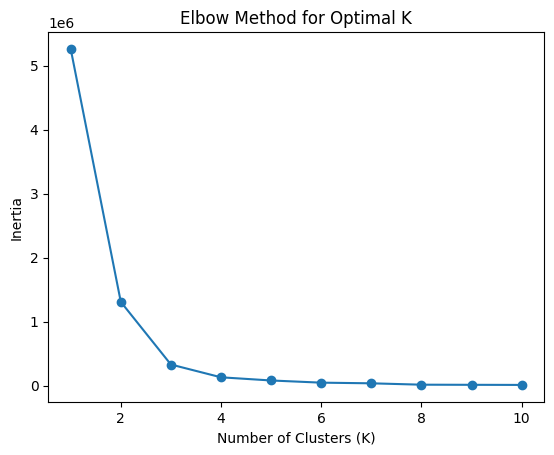

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Small sample for speed
data_sample = data_numeric.sample(1000, random_state=42)

# Calculate inertia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sample)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Objective 4: Applying K-Means Cluster

In [11]:
# K-Means with chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_sample)

# Add clusters
data_sample['Cluster'] = clusters

# Quick look
print(data_sample.head())
print("Cluster counts:", data_sample['Cluster'].value_counts())

        Quantity  UnitPrice  Cluster
459141         6       2.08        0
262111        12       2.95        0
374705        16       0.83        0
263904         2       8.50        0
138970       200       1.65        0
Cluster counts: Cluster
0    998
1      1
2      1
Name: count, dtype: int64


# Objective 5: Reducing with PCA

In [12]:
from sklearn.decomposition import PCA

# Features for PCA
features = data_sample[['Quantity', 'UnitPrice']]

# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# New dataframe
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_sample['Cluster']

# Quick look
print(pca_df.head())
print("Explained variance ratio:", pca.explained_variance_ratio_)

          PC1       PC2  Cluster
0   -7.148232 -0.662017      NaN
1   -1.150612  0.224242      NaN
2    2.855119 -1.884908      NaN
3  -11.165618  5.747117      NaN
4  186.852221 -0.566187      NaN
Explained variance ratio: [0.99853231 0.00146769]


# Objective 6: Visualise the Data

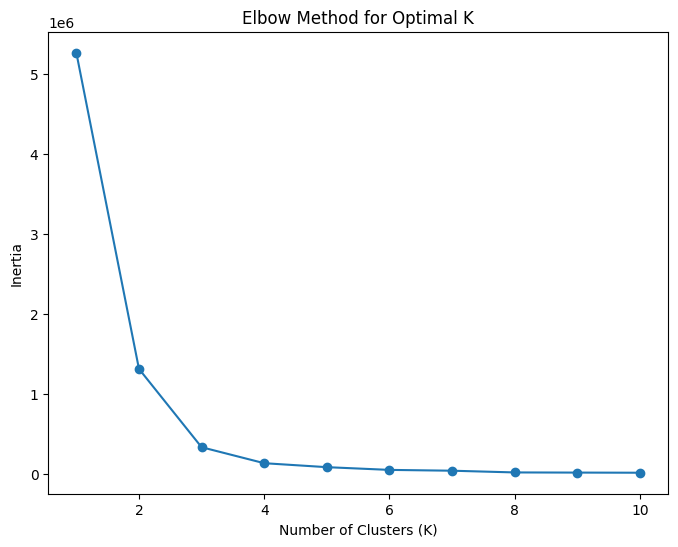

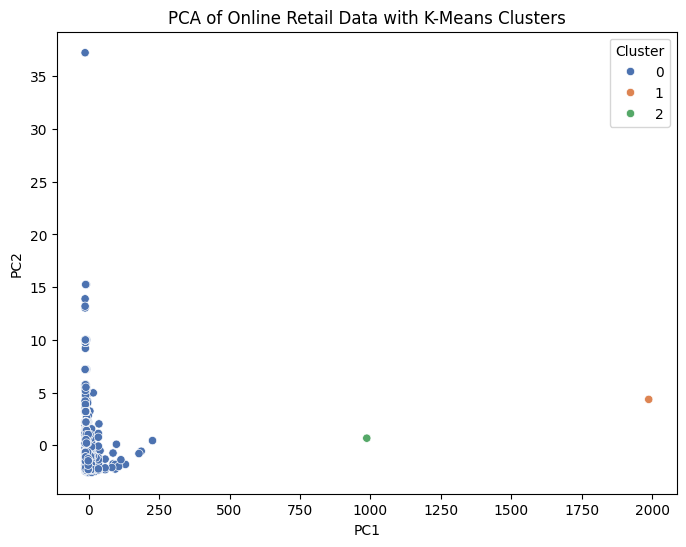

Cluster counts: Cluster
0    998
1      1
2      1
Name: count, dtype: int64
Explained variance ratio: [0.99853231 0.00146769]


In [13]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# Clean data
data = data.dropna()
data_numeric = data[['Quantity', 'UnitPrice']]
data_numeric = data_numeric[(data_numeric['Quantity'] > 0) & (data_numeric['UnitPrice'] > 0)]
data_sample = data_numeric.sample(1000, random_state=42)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sample)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust K
clusters = kmeans.fit_predict(data_sample)
data_sample['Cluster'] = clusters

# PCA
features = data_sample[['Quantity', 'UnitPrice']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='deep')
plt.title("PCA of Online Retail Data with K-Means Clusters")
plt.show()

# Info
print("Cluster counts:", data_sample['Cluster'].value_counts())
print("Explained variance ratio:", pca.explained_variance_ratio_)